In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Read semi-structured data

In [1]:
rawData = open("/Users/monsharm6/Projects/NaturalLanguageProcessing/smsspamcollection/SMSSpamCollection").read()

In [2]:
# Print the data
rawData[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [3]:
parsedData = rawData.replace('\t', '\n').split('\n')

In [5]:
parsedData[0:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [6]:
labelList = parsedData[0::2]

In [7]:
textList = parsedData[1::2]

In [8]:
labelList[0:10]

['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam']

In [14]:
len(labelList)

5574

In [13]:
labelList = labelList[:-1]

In [9]:
textList[0:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [12]:
len(textList)

5574

In [15]:
import pandas as pd

fullCorpus = pd.DataFrame({
    'label': labelList,
    'body_list': textList
})

In [16]:
fullCorpus.head()

,label,body_list
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
pd.set_option('display.max_colwidth', 100)

# Read data using Pandas

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)
fullCorpusII = pd.read_csv("/Users/monsharm6/Projects/NaturalLanguageProcessing/smsspamcollection/SMSSpamCollection", 
                           sep='\t', header=None)

In [2]:
fullCorpusII.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
fullCorpusII.shape

(5572, 2)

In [4]:
fullCorpusII.columns = ['label', 'body_text']

In [5]:
fullCorpusII.loc[fullCorpusII['label'] == 'ham'].count()

label        4825
body_text    4825
dtype: int64

In [6]:
fullCorpusII.loc[fullCorpusII['label'] == 'spam'].count()

label        747
body_text    747
dtype: int64

In [7]:
fullCorpusII.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label        5572 non-null object
body_text    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


# Remove punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
"I like NLP." == "I like NLP"

False

In [10]:
def remove_punct(text):
    # For the text that is passed in the function, loop over each character and return that character if that 
    # character if it is not present in string.punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

fullCorpusII['body_text_clean'] = fullCorpusII['body_text'].apply(lambda x: remove_punct(x))
fullCorpusII.head()

,label,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


# Tokenization

In [11]:
import re

# \W+ regular expression will split a word based on one or more non word characters. It will split on white 
# spaces, special characters 

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

fullCorpusII['body_text_tokenize'] = fullCorpusII['body_text_clean'].apply(lambda x: tokenize(x.lower()))

In [12]:
fullCorpusII.head()

,label,body_text,body_text_clean,body_text_tokenize
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


# Remove stopwords

In [13]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

In [14]:
def remove_stopwords(tokenize_list):
    text = [word for word in tokenize_list if word not in stopword]
    return text

fullCorpusII['body_text_nostop'] = fullCorpusII['body_text_tokenize'].apply(lambda x: remove_stopwords(x))

In [15]:
fullCorpusII.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


# Supplemental data cleaning: Using stemming

In [16]:
import nltk 

ps = nltk.PorterStemmer()

In [17]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [18]:
print(ps.stem("growing"))
print(ps.stem("grow"))
print(ps.stem("grows"))

grow
grow
grow


# Stem text

In [21]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [24]:
fullCorpusII['body_text_stemmed'] = fullCorpusII['body_text_nostop'].apply(lambda x: stemming(x))

In [25]:
fullCorpusII.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


# Lemmatizing 

In [26]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [27]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [28]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [29]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [30]:
def lemmatize(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

fullCorpusII['body_text_lemmatized'] = fullCorpusII['body_text_nostop'].apply(lambda x: lemmatize(x))

In [31]:
fullCorpusII.head()

,label,body_text,body_text_clean,body_text_tokenize,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"


# Vectorization Raw Data: Count Vectorization

In [1]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("/Users/monsharm6/Projects/NaturalLanguageProcessing/smsspamcollection/SMSSpamCollection", 
                  sep='\t', header=None)
data.columns = ['label', 'body_text']

In [2]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Apply CountVectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text']) ## Fit only trains the vectorizer that are in the corpus
# fit_transform will actually vectorize the dataset
print(X_counts.shape)
print(count_vect.get_feature_names())

(5572, 8109)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

There are 5572 text messages that contain a total of 8109 words. Or in other words there are 5572 rows and 8109 columns. 

## Apply CountVectorizer to smaller sample

In [4]:
data_sample = data[0:20]

In [5]:
count_vect_sample = CountVectorizer(analyzer=clean_text)

In [6]:
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])

In [7]:
print(X_counts_sample.shape)

(20, 221)


In [8]:
print(count_vect_sample.get_feature_names())

['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aid', 'alreadi', 'amor', 'anymor', 'appli', 'around', 'avail', 'b', 'back', 'bless', 'breather', 'brother', 'buffet', 'bugi', 'c', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'chg', 'cine', 'claim', 'click', 'co', 'code', 'colour', 'comp', 'copi', 'cost', 'crazi', 'credit', 'cri', 'csh11', 'cup', 'custom', 'darl', 'date', 'dont', 'dun', 'e', 'earli', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'final', 'fine', 'free', 'freemsg', 'friend', 'fulfil', 'fun', 'go', 'goalsteam', 'goe', 'gonna', 'got', 'gota', 'grant', 'great', 'help', 'hey', 'hl', 'home', 'hor', 'hour', 'httpwap', 'id', 'im', 'info', 'ive', 'jackpot', 'joke', 'jurong', 'k', 'kim', 'kl341', 'la', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', '

## Vectorizers output sparse matrices 

**Sparse Matrix:** A matrix that contains mostly zeros. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of non-zero elements. 

In [9]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())

In [10]:
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


X_counts_df is the document term matrix that contains the number of text messages as rows and distinct words contained in them as columns. The numbers represent the number of times each word occured in the text. 

In [11]:
X_counts_df.columns = count_vect_sample.get_feature_names()

In [12]:
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150,150pday,...,wkli,wonder,wont,word,world,wwwdbuknet,xxx,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vectorizing Raw Data: N-Grams

**N-Grams:** Create a document-term matrix where the counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length l in your text. 

"NLP is an interesting topic."

|n| Name | Tokens |
|-|------|--------|
|2|Bigram|["nlp is"], ["is an"], ["an interesting"], ["interesting topic"]|
|3|Trigram|["nlp is an"], ["is an interesting"], ["an interesting topic"]|
|4|four-gram|["nlp is an interesting"], ["is an interesting topic"]|


## Create a function to remove punctuation, tokenize, remove stop words, and stem

In [13]:
def clean_text_different(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('W\+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [14]:
data['body_text'].head()

0    Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...
1                                                                          Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3                                                      U dun say so early hor... U c already then say...
4                                          Nah I don't think he goes to usf, he lives around here though
Name: body_text, dtype: object

In [15]:
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text_different(x))

In [16]:
data.head()

,label,body_text,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amo...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


## Apply CountVectorizer with N-Gram

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
n_gram_vect = CountVectorizer(ngram_range=(2,2))
## Count vectorizer will search in the range 2,2 meaning only for bi-grams. If the range is 1,2, then it will look 
## for unigram and bigrams. If the range is 1,3, then it will start with unigrams and look until tri-grams 
## including bi-grams.  
X_counts = n_gram_vect.fit_transform(data['cleaned_text'])
print(X_counts.shape)

(5572, 41903)


In [70]:
X_count_feat = pd.concat([data['body_length'], data['punct%'], pd.DataFrame(X_counts.toarray())], axis=1)

There are 5572 rows or text messages that contain 41903 distinct combinations of two words.

In [18]:
print(n_gram_vect.get_feature_names())

['008704050406 sp', '0089my last', '0121 2025050', '01223585236 xx', '01223585334 to', '0125698789 ring', '02 user', '020603 this', '0207 153', '02072069400 bx', '02073162414 now', '02085076972 reply', '020903 this', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '0578 now', '06 good', '07046744435 now', '07090298926 to', '07099833605 to', '07123456789 to', '0721072 to', '07732584351 rodger', '07734396839 ibh', '07742676969 shows', '07753741225 shows', '0776xxxxxxx uve', '077xxx won', '07801543489 are', '07808 xxxxxx', '07808247860 shows', '07808726822 was', '07815296484 shows', '0784987 shows', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 shows', '07xxxxxxxxx shows', '07xxxxxxxxx won', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 now', '08000839402 now', '08000839402 or', '08000839402 or2optouthv9d', '08000930705 del', '08000930705 for', '08000930705 now', '08000930705 or', '08000938767 

### Apply CountVectorizer to smaller sample

In [19]:
data_sample = data[0:20]
n_gram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = n_gram_vect_sample.fit_transform(data_sample['cleaned_text'])
print(X_counts_sample.shape)

(20, 343)


In [20]:
print(n_gram_vect_sample.get_feature_names())

['09061701461 claim', '100 to', '100000 prize', '11 months', '12 hours', '150 to', '150pday 6days', '16 tsandcs', '20000 pounds', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6days 16', '81010 tc', '87077 eg', '87077 trywales', '87121 to', '87575 cost', '900 prize', 'about this', 'aids pat', 'all callers', 'all tim', 'already then', 'amore wat', 'and blessing', 'and dont', 'and no', 'and send', 'and will', 'anymore tonight', 'apply 08452810075over18', 'apply reply', 'around here', 'as per', 'as valued', 'as your', 'at all', 'available only', 'back id', 'be home', 'been searching', 'been selected', 'been set', 'been weeks', 'been wonderful', 'blessing at', 'breather promise', 'brother is', 'buffet cine', 'bugis great', 'call 09061701461', 'call the', 'callers press', 'callertune for', 'camera for', 'cash from', 'chances to', 'chgs to', 'cine there', 'claim call', 'claim code', 'claim to', 'click here', 'click the', 'co free', 'code kl341', 'colour mobiles', 'comp to', 'copy y

In [21]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())

In [22]:
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,333,334,335,336,337,338,339,340,341,342
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_counts_df.columns = n_gram_vect_sample.get_feature_names()

# Inverse Document Frequency Weighting 

$w_{i,j}$ = $tf_{i,j}$ $\times$ log$\frac{N}{df_{i}}$

* $tf_{i,j}$: Number of times the word i occured in word j divided by the total number of terms (words) in j 
* $df_{i}$: Number of documents containing i
* N: Total number of documents

## Create function to remove punctuation, tokenize, remove stop words, and stem

In [24]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Apply TfidfVcetorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidf_Vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_Vect.fit_transform(data['body_text'])
print(X_tfidf.shape)

(5572, 8109)


In [27]:
data_sample = data[0:20]

In [28]:
tfidf_Vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_Vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)

(20, 221)


In [29]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())

In [30]:
X_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.0,0.198423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198423,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [31]:
X_tfidf_df.columns = tfidf_Vect_sample.get_feature_names()

# Feature Engineering

## Create a feature for text message length

Working under the hypothesis that spam messages are longer than ham messages. 

In [32]:
data['body_length'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

In [33]:
data.head()

,label,body_text,cleaned_text,body_length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amo...,92
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,24
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...,128
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,39
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,49


## Create a feature for % of text that is punctuation 

In [34]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [35]:
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

In [36]:
data.head()

,label,body_text,cleaned_text,body_length,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amo...,92,9.8
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive e...,128,4.7
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,49,4.1


In [69]:
X_tfidf_feat = pd.concat([data['body_length'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

## Evaluate created features

In [37]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

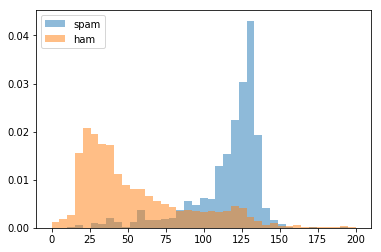

In [38]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label'] == 'spam']['body_length'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['body_length'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper left')

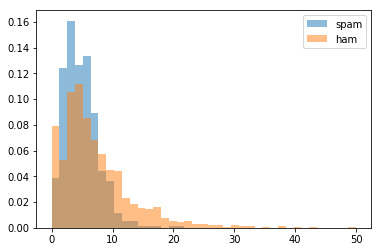

In [39]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label'] == 'spam']['punct%'], bins, alpha=0.5, density=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins, alpha=0.5, density=True, label='ham')
pyplot.legend(loc='upper right')

## Identifying features for transformation

Text(0.5, 1.0, 'Body length distribution')

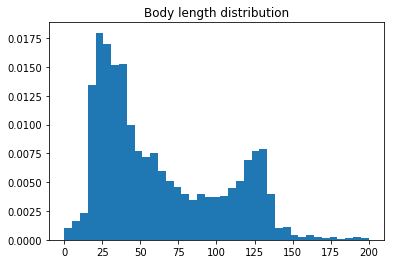

In [40]:
bins = np.linspace(0, 200, 40)
pyplot.hist(data['body_length'], bins, density=True)
pyplot.title('Body length distribution')

Text(0.5, 1.0, 'Punctuation % distribution')

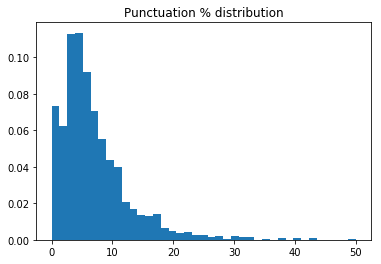

In [41]:
bins = np.linspace(0, 50, 40)
pyplot.hist(data['punct%'], bins, density=True)
pyplot.title('Punctuation % distribution')

# Box-Cox Power Transformation

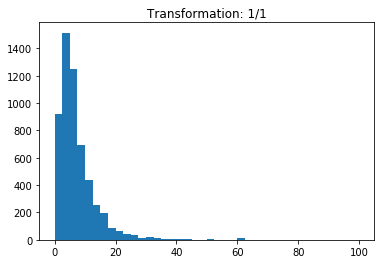

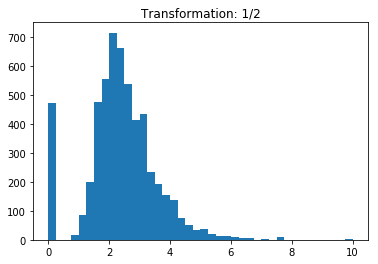

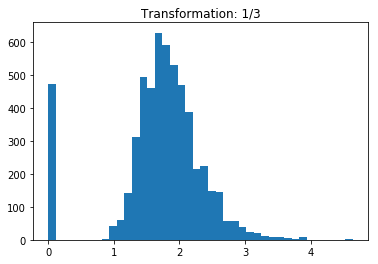

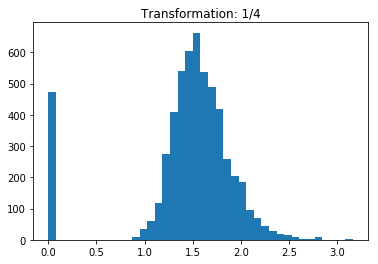

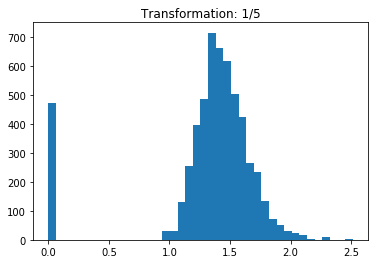

In [42]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['punct%'])**(1/i), bins=40)
    pyplot.title("Transformation: 1/{}".format(str(i)))
    pyplot.show()

Box-cox transformation is applicable for data that is skewed and helps bring it back to normal distribution. 

# Machine Learning Models: Random Forest

**Benefits of ensemble learning**

* Versatile: Can be used for classification or regression
* Easily handles outliers, missing values 
* Can handle various types of input, continuous or ordinal
* Less likely to overfit
* Outputs feature importance

## Explore RandomForestClassifier Attributes & Hyperparameters

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
print(dir(RandomForestClassifier))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_make_estimator', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']


In [45]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## Explore RandomForestClassifier through Cross-validation

In [46]:
from sklearn.model_selection import KFold, cross_validate

In [47]:
rf = RandomForestClassifier(n_jobs=-1)
# njobs = -1 allows decision trees to be built parallel and allows for faster processing. 

In [48]:
k_fold = KFold(n_splits=5)

In [49]:
X_features = pd.concat([data['body_length'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [50]:
X_features.head(200)

,body_length,punct%,0,1,2,3,4,5,6,7,...,8099,8100,8101,8102,8103,8104,8105,8106,8107,8108
0,92,9.8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,24,25.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,128,4.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,39,15.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,49,4.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,116,6.9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,62,3.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,135,4.4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,132,4.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
9,126,1.6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [51]:
cross_validate(rf, X_features, data['label'], cv=k_fold, scoring='accuracy', n_jobs=-1, return_train_score=True)

{'fit_time': array([2.72558308, 2.65324521, 2.65211892, 2.65407801, 2.65456629]),
 'score_time': array([0.18270898, 0.20566797, 0.20914316, 0.20827699, 0.20029378]),
 'test_score': array([0.97130045, 0.97219731, 0.97307002, 0.96319569, 0.96947935]),
 'train_score': array([0.99663451, 0.99685887, 0.99775684, 0.99820547, 0.99708389])}

## Explore RandomForestClassifier through holdout set

In [52]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [56]:
print(rf_model)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [57]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.08870163040282807, 'body_length'),
 (0.0460690976103119, 2033),
 (0.032917663664001985, 4801),
 (0.03073899152239915, 1805),
 (0.02481498278810705, 3136),
 (0.017414883983625097, 6290),
 (0.017313828029163765, 6976),
 (0.01666652976204885, 5993),
 (0.01458406542040707, 397),
 (0.014474608526020503, 690)]

In [58]:
y_pred = rf_model.predict(X_test)

In [59]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary') 
# When the labels are not binary (0 or 1) such as in this case our labels are ham or spam, we need to tell the 
# model what we want to it predict. Meaning our positive label will be 'spam'. So it can predict 'spam' labels. 

In [60]:
print(precision, recall, fscore, support)

1.0 0.6358024691358025 0.7773584905660377 None


In [61]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                         round(recall, 3),
                                                        round((y_pred == y_test).sum()/len(y_pred), 3)))

Precision: 1.0 / Recall: 0.636 / Accuracy: 0.947


100% precision means when the model identified something as spam, it actually was spam. 57% recall means that 57% of total emails were properly placed in your spam folder, but the remaining 43% still went into your inbox, which is not too great. 94% accuracy means that out of all the emails that came into your inbox, 94% were identified correctly as spam. 

# Building Machine Learning Classifiers: Explore Random Forest model with grid search 

**Grid search:** Defining a grid of hyper-parameter settings, and then exploring a model fit with each of those hyper-parameter settings. 

## Build our own grid search

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [66]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Estimators: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision,3), round(recall,3), round(fscore,3), 
        round((y_test == y_pred).sum()/len(y_test),3)))

In [67]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Estimators: 10 / Depth: 10 ---- Precision: 1.0 / Recall: 0.215 / Accuracy: 0.354
Estimators: 10 / Depth: 20 ---- Precision: 1.0 / Recall: 0.592 / Accuracy: 0.744
Estimators: 10 / Depth: 30 ---- Precision: 0.98 / Recall: 0.746 / Accuracy: 0.847
Estimators: 10 / Depth: None ---- Precision: 1.0 / Recall: 0.792 / Accuracy: 0.884
Estimators: 50 / Depth: 10 ---- Precision: 1.0 / Recall: 0.246 / Accuracy: 0.395
Estimators: 50 / Depth: 20 ---- Precision: 1.0 / Recall: 0.6 / Accuracy: 0.75
Estimators: 50 / Depth: 30 ---- Precision: 1.0 / Recall: 0.754 / Accuracy: 0.86
Estimators: 50 / Depth: None ---- Precision: 1.0 / Recall: 0.823 / Accuracy: 0.903
Estimators: 100 / Depth: 10 ---- Precision: 1.0 / Recall: 0.215 / Accuracy: 0.354
Estimators: 100 / Depth: 20 ---- Precision: 1.0 / Recall: 0.577 / Accuracy: 0.732
Estimators: 100 / Depth: 30 ---- Precision: 1.0 / Recall: 0.731 / Accuracy: 0.844
Estimators: 100 / Depth: None ---- Precision: 1.0 / Recall: 0.831 / Accuracy: 0.908


# Building Machine Learning Classifiers: Evaluate Random Forest with GridSearchCV

**Grid Search:** Exhaustively search all parameter combinations in a given grid to determine the best model. 

**Cross-validation:** Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration. 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [75]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300], 
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,34.167914,0.321562,0.353345,0.010824,None,300,"{'max_depth': None, 'n_estimators': 300}",0.979372,0.977578,0.973968,...,0.973977,0.004103,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,38.666197,0.192108,0.467634,0.037907,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977578,0.976682,0.974865,...,0.973439,0.003714,2,0.999327,0.999327,0.999103,0.999103,0.999103,0.999192,0.000110
10,21.447929,0.841430,0.296501,0.028149,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976682,0.979372,0.973968,...,0.972900,0.004938,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,3.132666,0.163538,0.157391,0.023616,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.972197,0.974888,0.973070,...,0.972721,0.003341,4,0.995513,0.992147,0.991700,0.992822,0.992373,0.992911,0.001350
7,20.473156,0.367601,0.305359,0.018036,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.975785,0.980269,0.973070,...,0.972721,0.005105,4,0.999327,0.998878,0.999103,0.999776,0.999103,0.999237,0.000304


In [76]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300], 
         'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,130.710866,4.402956,1.323493,0.073042,None,150,"{'max_depth': None, 'n_estimators': 150}",0.956054,0.953363,0.956014,...,0.953338,0.004177,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
11,171.672757,17.982629,1.159738,0.278835,None,300,"{'max_depth': None, 'n_estimators': 300}",0.955157,0.951570,0.956014,...,0.952800,0.003663,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,54.069236,10.981531,1.790589,0.501648,None,10,"{'max_depth': None, 'n_estimators': 10}",0.948879,0.946188,0.949731,...,0.948851,0.003152,3,0.992820,0.995064,0.991700,0.991700,0.992598,0.992776,0.001231
8,134.240402,9.267274,1.381856,0.269006,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.941704,0.941704,0.941652,...,0.940237,0.004352,4,0.965672,0.967243,0.965680,0.966128,0.967699,0.966484,0.000835
6,59.580866,4.688071,1.212134,0.145695,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.947085,0.941704,0.947935,...,0.940057,0.007089,5,0.969037,0.964999,0.969269,0.967923,0.963437,0.966933,0.002316


# Gradient boosting

An ensemble technique is that creates multiple models and then combines them to produce better results than any of the single models individually. 

Gradient boosting is also an ensemble learning method that takes an iterative approach to combine weak learners to create a strong learner by focusing on mistakes of prior iterations.  

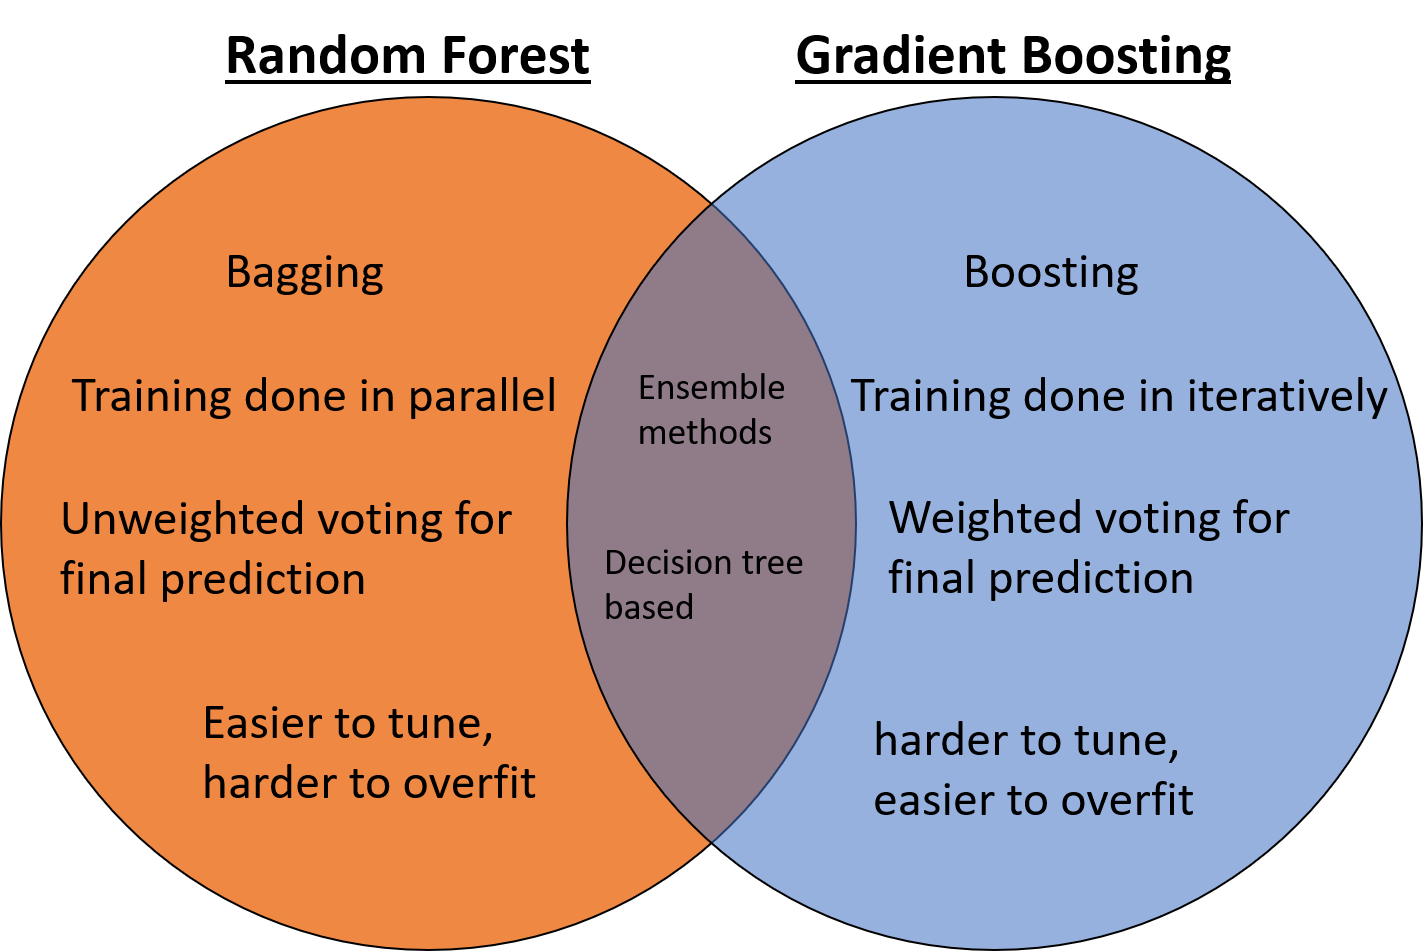

**Differences between Random Forest and Gradient Boosting**

* Random forest uses bagging while gradient boosting uses boosting methodology for sampling data sets. Bagging assigns random samples for different trees, while boosting samples with an increased weight for the ones that got wrong previously. 

* Trees in Random Forest can be trained parallely, so training them is a lot faster. However, trees are trained iteratively in Gradient Boosting, so it takes much longer to train. If our training sets are massive, this becomes a serious problem unless you are working with GPU nodes.

* Random Forest uses unweighted voting for final prediction, while Gradient Boosting uses a weighted voting for final prediction. 

* Lastly, Random Forests are easier to tune and harder to overfit, while Gradient Boosting is harder to tune and easier to overfit. 

**Trade-offs with Gradient Boosting**

* Pros
        - Extremely powerful
        - Versatile, accepts various types of inputs
        - Versatile, can be used for classification or regression
        - Outputs feature importance
        
* Cons
        - Longer to train (can't parallelize)
        - More likely to overfit
        - More difficult to properly tune

# Building Machine Learning Classifiers: Explore Gradient Boosting model with grid-search

## Explore GradientBoostingClassifier Attributes & Hyperparameters

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
print(GradientBoostingClassifier)
print(GradientBoostingClassifier())

<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


## Build our own Gradient Boosting model

In [80]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [83]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, 
                                    max_depth=max_depth, 
                                    learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print('Estimators: {} / Depth: {} / Learning Rate: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, lr, round(precision,3), round(recall,3), round(fscore,3), 
        round((y_test == y_pred).sum()/len(y_test),3)))

In [84]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Estimators: 50 / Depth: None / Learning Rate: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.0
Estimators: 50 / Depth: None / Learning Rate: 0.1 ---- Precision: 0.913 / Recall: 0.782 / Accuracy: 0.842
Estimators: 50 / Depth: None / Learning Rate: 1 ---- Precision: 0.878 / Recall: 0.83 / Accuracy: 0.853
Estimators: 50 / Depth: None / Learning Rate: 0.01 ---- Precision: 1.0 / Recall: 0.007 / Accuracy: 0.014
Estimators: 50 / Depth: None / Learning Rate: 0.1 ---- Precision: 0.899 / Recall: 0.844 / Accuracy: 0.87
Estimators: 50 / Depth: None / Learning Rate: 1 ---- Precision: 0.853 / Recall: 0.871 / Accuracy: 0.862
Estimators: 50 / Depth: None / Learning Rate: 0.01 ---- Precision: 1.0 / Recall: 0.014 / Accuracy: 0.027
Estimators: 50 / Depth: None / Learning Rate: 0.1 ---- Precision: 0.883 / Recall: 0.871 / Accuracy: 0.877
Estimators: 50 / Depth: None / Learning Rate: 1 ---- Precision: 0.815 / Recall: 0.837 / Accuracy: 0.826
Estimators: 50 / Depth: None / Learning Rate: 0.01 ---- Preci